# **Dataset**

Marital status: The marital status of the student. (Categorical) <br>
Application mode: The method of application used by the student. (Categorical)<br>
Application order: The order in which the student applied. (Numerical)<br>
Course: The course taken by the student. (Categorical)<br>
Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)<br>
Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)<br>
Nacionality: The nationality of the student. (Categorical)<br>
Mother's qualification: The qualification of the student's mother. (Categorical)<br>
Father's qualification: The qualification of the student's father. (Categorical)<br>
Mother's occupation: The occupation of the student's mother. (Categorical)<br>
Father's occupation: The occupation of the student's father. (Categorical)<br>
Displaced: Whether the student is a displaced person. (Categorical)<br>
Educational special needs: Whether the student has any special educational needs. (Categorical)<br>
Debtor: Whether the student is a debtor. (Categorical)<br>
Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)<br>
Gender: The gender of the student. (Categorical)<br>
Scholarship holder: Whether the student is a scholarship holder. (Categorical)<br>
Age at enrollment: The age of the student at the time of enrollment. (Numerical)<br>
International: Whether the student is an international student. (Categorical)<br>
Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)<br>
Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)<br>
Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)<br>
Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)<br>

# **Multi-Class Classification with XGBoost**

# **Install Libraries**

In [2]:
!pip install scikit-learn
!pip install xgboost
!pip install featuretools
!pip install optuna

     -------------------------------------- 365.3/365.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 212.2/212.2 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB ? eta 0:00:00


# **Import Packages**

In [25]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import featuretools as ft
import optuna
import matplotlib.pyplot as plt

# **Split Dataset**

In [3]:
df = pd.read_csv('dataset.csv')
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [4]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [5]:
countA, countB,countC = df.Target.value_counts()
print("Ratio of classes = ", countA, ":", countB, ":", countC)

Ratio of classes =  2209 : 1421 : 794


In [6]:
# Rename mispelled column name
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True) 
features_list = ['Marital status', 
                 'Application mode',
                 'Application order',
                 'Course',
                 'Daytime/evening attendance',
                 'Previous qualification',
                 'Nationality',
                 "Mother's qualification",
                 "Father's qualification",
                 "Mother's occupation",
                 "Father's occupation",
                 'Displaced',
                 'Educational special needs',
                 'Debtor',
                 'Tuition fees up to date',
                 'Gender',
                 'Scholarship holder',
                 'Age at enrollment',
                 'International',
                 'Curricular units 1st sem (credited)',
                 'Curricular units 1st sem (enrolled)',
                 'Curricular units 1st sem (evaluations)',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 1st sem (without evaluations)',
                 'Curricular units 2nd sem (credited)',
                 'Curricular units 2nd sem (enrolled)',
                 'Curricular units 2nd sem (evaluations)',
                 'Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (grade)',
                 'Curricular units 2nd sem (without evaluations)',
                 'Unemployment rate',
                 'Inflation rate',
                 'GDP']

forecast_var = ['Target']

In [7]:
X = df[features_list]
y = df[forecast_var] 

# Encode categorical features
y = y.astype("category")
le = LabelEncoder()
y = le.fit_transform(np.ravel(y))

X["Marital status"] = X["Marital status"].astype("category")
X["Application mode"] = X["Application mode"].astype("category")
X["Course"] = X["Course"].astype("category")
X["Daytime/evening attendance"] = X["Daytime/evening attendance"].astype("category")
X["Previous qualification"] = X["Previous qualification"].astype("category")
X["Nationality"] = X["Nationality"].astype("category")
X["Mother's qualification"] = X["Mother's qualification"].astype("category")
X["Father's qualification"] = X["Father's qualification"].astype("category")
X["Mother's occupation"] = X["Mother's occupation"].astype("category")
X["Father's occupation"] = X["Father's occupation"].astype("category")
X["Displaced"] = X["Displaced"].astype("category")
X["Educational special needs"] = X["Educational special needs"].astype("category")
X["Debtor"] = X["Debtor"].astype("category")
X["Tuition fees up to date"] = X["Tuition fees up to date"].astype("category")
X["Gender"] = X["Gender"].astype("category")
X["Scholarship holder"] = X["Scholarship holder"].astype("category")
X["International"] = X["International"].astype("category")

#Normalise numerical features
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
# Split validation set from initial train set to form 8:1:1 train:validation:test ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.89,)

# **Create Model**

In [8]:
"""
Experiments:
1. n_estimators = 5000 (overfit beyond 3900), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.55598, Accuracy:0.7742663656884876, F1 Score:[0.76760563 0.4822695  0.86767896]
2. Long Training Time: n_estimators = 3900 (overfit beyond 2990), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'dart',enable_categorical=True
logloss:0.59134, Accuracy:0.7652370203160271, F1 Score:[0.79856115 0.49350649 0.83700441]

"""
# model.load_model('model_1.json')
# Logloss better metric for training than accuracy, should be < 1.01
model = xgb.XGBClassifier(n_estimators = 3900, early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'dart',enable_categorical=True)
model.fit(X_train, y_train, eval_set = [(X_val,y_val)], verbose = 10)

[0]	validation_0-mlogloss:1.09786
[10]	validation_0-mlogloss:1.09035
[20]	validation_0-mlogloss:1.08299
[30]	validation_0-mlogloss:1.07580
[40]	validation_0-mlogloss:1.06878
[50]	validation_0-mlogloss:1.06185
[60]	validation_0-mlogloss:1.05506
[70]	validation_0-mlogloss:1.04831
[80]	validation_0-mlogloss:1.04161
[90]	validation_0-mlogloss:1.03510
[100]	validation_0-mlogloss:1.02870
[110]	validation_0-mlogloss:1.02239
[120]	validation_0-mlogloss:1.01618
[130]	validation_0-mlogloss:1.01012
[140]	validation_0-mlogloss:1.00414
[150]	validation_0-mlogloss:0.99831
[160]	validation_0-mlogloss:0.99256
[170]	validation_0-mlogloss:0.98688
[180]	validation_0-mlogloss:0.98136
[190]	validation_0-mlogloss:0.97591
[200]	validation_0-mlogloss:0.97050
[210]	validation_0-mlogloss:0.96523
[220]	validation_0-mlogloss:0.96006
[230]	validation_0-mlogloss:0.95499
[240]	validation_0-mlogloss:0.95005
[250]	validation_0-mlogloss:0.94514
[260]	validation_0-mlogloss:0.94028
[270]	validation_0-mlogloss:0.93545
[28

[2250]	validation_0-mlogloss:0.60663
[2260]	validation_0-mlogloss:0.60627
[2270]	validation_0-mlogloss:0.60591
[2280]	validation_0-mlogloss:0.60557
[2290]	validation_0-mlogloss:0.60521
[2300]	validation_0-mlogloss:0.60482
[2310]	validation_0-mlogloss:0.60441
[2320]	validation_0-mlogloss:0.60401
[2330]	validation_0-mlogloss:0.60360
[2340]	validation_0-mlogloss:0.60322
[2350]	validation_0-mlogloss:0.60286
[2360]	validation_0-mlogloss:0.60250
[2370]	validation_0-mlogloss:0.60222
[2380]	validation_0-mlogloss:0.60192
[2390]	validation_0-mlogloss:0.60164
[2400]	validation_0-mlogloss:0.60137
[2410]	validation_0-mlogloss:0.60110
[2420]	validation_0-mlogloss:0.60083
[2430]	validation_0-mlogloss:0.60056
[2440]	validation_0-mlogloss:0.60028
[2450]	validation_0-mlogloss:0.59999
[2460]	validation_0-mlogloss:0.59967
[2470]	validation_0-mlogloss:0.59934
[2480]	validation_0-mlogloss:0.59904
[2490]	validation_0-mlogloss:0.59877
[2500]	validation_0-mlogloss:0.59851
[2510]	validation_0-mlogloss:0.59827
[

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=50,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3900, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [9]:
model.save_model('model_3.json')

In [10]:
# Rank features by importance
df_feature_importance = pd.DataFrame(index = model.get_booster().feature_names, data = model.feature_importances_, columns = ['Importance'])
df_feature_importance.sort_values('Importance',ascending=False)

,Importance
Curricular units 2nd sem (approved),0.317372
Tuition fees up to date,0.131132
Curricular units 1st sem (enrolled),0.050416
Curricular units 2nd sem (enrolled),0.042839
Course,0.028988
Curricular units 1st sem (approved),0.025619
Previous qualification,0.025611
Curricular units 2nd sem (evaluations),0.022658
Curricular units 1st sem (evaluations),0.021768
Scholarship holder,0.020323


# **Predict and Evaluate Performance**

Test Data
Accuracy  :	 0.7652370203160271
F1 Score  :	 [0.79856115 0.49350649 0.83700441]


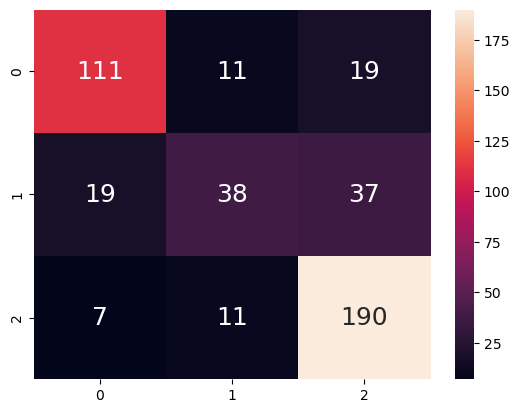

In [11]:
# Use model to predict on test data
y_test_pred = model.predict(X_test)
df.head()

# Print the Classification Accuracy
print("Test Data")

#print("Accuracy  :\t", model.score(X_test, y_test))
# Dropout, Enrolled, Graduate
#print("F1 Score  :\t",f1_score(y_test, y_test_pred, average=None))

print(classification_report(y_test, y_test_pred))

# Plot the two-way Confusion Matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Visualise Tree**

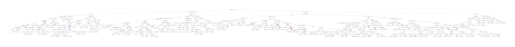

In [12]:
# Visualise first tree of model
fig = xgb.plot_tree(model)
plt.savefig('XGB_tree_3.png', dpi = 4800)

# **Anomaly Detection with Isolation Forest**

In [13]:
from sklearn.ensemble import IsolationForest

In [14]:
df = pd.read_csv('dataset.csv')

# **Create Model**

In [32]:
model_IF = IsolationForest(n_estimators=5000, contamination = 0.32, max_features= 34, verbose = 10, bootstrap=True)
model_IF.fit(X.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 5000 for this parallel run (total 5000)...
Building estimator 2 of 5000 for this parallel run (total 5000)...
Building estimator 3 of 5000 for this parallel run (total 5000)...
Building estimator 4 of 5000 for this parallel run (total 5000)...
Building estimator 5 of 5000 for this parallel run (total 5000)...
Building estimator 6 of 5000 for this parallel run (total 5000)...
Building estimator 7 of 5000 for this parallel run (total 5000)...
Building estimator 8 of 5000 for this parallel run (total 5000)...
Building estimator 9 of 5000 for this parallel run (total 5000)...
Building estimator 10 of 5000 for this parallel run (total 5000)...
Building estimator 11 of 5000 for this parallel run (total 5000)...
Building estimator 12 of 5000 for this parallel run (total 5000)...
Building estimator 13 of 5000 for this parallel run (total 5000)...
Building estimator 14 of 5000 for this parallel run (total 5000)...
Building estimator 15 of 5000 for this parallel run (tota

Building estimator 143 of 5000 for this parallel run (total 5000)...
Building estimator 144 of 5000 for this parallel run (total 5000)...
Building estimator 145 of 5000 for this parallel run (total 5000)...
Building estimator 146 of 5000 for this parallel run (total 5000)...
Building estimator 147 of 5000 for this parallel run (total 5000)...
Building estimator 148 of 5000 for this parallel run (total 5000)...
Building estimator 149 of 5000 for this parallel run (total 5000)...
Building estimator 150 of 5000 for this parallel run (total 5000)...
Building estimator 151 of 5000 for this parallel run (total 5000)...
Building estimator 152 of 5000 for this parallel run (total 5000)...
Building estimator 153 of 5000 for this parallel run (total 5000)...
Building estimator 154 of 5000 for this parallel run (total 5000)...
Building estimator 155 of 5000 for this parallel run (total 5000)...
Building estimator 156 of 5000 for this parallel run (total 5000)...
Building estimator 157 of 5000 for

Building estimator 262 of 5000 for this parallel run (total 5000)...
Building estimator 263 of 5000 for this parallel run (total 5000)...
Building estimator 264 of 5000 for this parallel run (total 5000)...
Building estimator 265 of 5000 for this parallel run (total 5000)...
Building estimator 266 of 5000 for this parallel run (total 5000)...
Building estimator 267 of 5000 for this parallel run (total 5000)...
Building estimator 268 of 5000 for this parallel run (total 5000)...
Building estimator 269 of 5000 for this parallel run (total 5000)...
Building estimator 270 of 5000 for this parallel run (total 5000)...
Building estimator 271 of 5000 for this parallel run (total 5000)...
Building estimator 272 of 5000 for this parallel run (total 5000)...
Building estimator 273 of 5000 for this parallel run (total 5000)...
Building estimator 274 of 5000 for this parallel run (total 5000)...
Building estimator 275 of 5000 for this parallel run (total 5000)...
Building estimator 276 of 5000 for

Building estimator 406 of 5000 for this parallel run (total 5000)...
Building estimator 407 of 5000 for this parallel run (total 5000)...
Building estimator 408 of 5000 for this parallel run (total 5000)...
Building estimator 409 of 5000 for this parallel run (total 5000)...
Building estimator 410 of 5000 for this parallel run (total 5000)...
Building estimator 411 of 5000 for this parallel run (total 5000)...
Building estimator 412 of 5000 for this parallel run (total 5000)...
Building estimator 413 of 5000 for this parallel run (total 5000)...
Building estimator 414 of 5000 for this parallel run (total 5000)...
Building estimator 415 of 5000 for this parallel run (total 5000)...
Building estimator 416 of 5000 for this parallel run (total 5000)...
Building estimator 417 of 5000 for this parallel run (total 5000)...
Building estimator 418 of 5000 for this parallel run (total 5000)...
Building estimator 419 of 5000 for this parallel run (total 5000)...
Building estimator 420 of 5000 for

Building estimator 549 of 5000 for this parallel run (total 5000)...
Building estimator 550 of 5000 for this parallel run (total 5000)...
Building estimator 551 of 5000 for this parallel run (total 5000)...
Building estimator 552 of 5000 for this parallel run (total 5000)...
Building estimator 553 of 5000 for this parallel run (total 5000)...
Building estimator 554 of 5000 for this parallel run (total 5000)...
Building estimator 555 of 5000 for this parallel run (total 5000)...
Building estimator 556 of 5000 for this parallel run (total 5000)...
Building estimator 557 of 5000 for this parallel run (total 5000)...
Building estimator 558 of 5000 for this parallel run (total 5000)...
Building estimator 559 of 5000 for this parallel run (total 5000)...
Building estimator 560 of 5000 for this parallel run (total 5000)...
Building estimator 561 of 5000 for this parallel run (total 5000)...
Building estimator 562 of 5000 for this parallel run (total 5000)...
Building estimator 563 of 5000 for

Building estimator 668 of 5000 for this parallel run (total 5000)...
Building estimator 669 of 5000 for this parallel run (total 5000)...
Building estimator 670 of 5000 for this parallel run (total 5000)...
Building estimator 671 of 5000 for this parallel run (total 5000)...
Building estimator 672 of 5000 for this parallel run (total 5000)...
Building estimator 673 of 5000 for this parallel run (total 5000)...
Building estimator 674 of 5000 for this parallel run (total 5000)...
Building estimator 675 of 5000 for this parallel run (total 5000)...
Building estimator 676 of 5000 for this parallel run (total 5000)...
Building estimator 677 of 5000 for this parallel run (total 5000)...
Building estimator 678 of 5000 for this parallel run (total 5000)...
Building estimator 679 of 5000 for this parallel run (total 5000)...
Building estimator 680 of 5000 for this parallel run (total 5000)...
Building estimator 681 of 5000 for this parallel run (total 5000)...
Building estimator 682 of 5000 for

Building estimator 796 of 5000 for this parallel run (total 5000)...
Building estimator 797 of 5000 for this parallel run (total 5000)...
Building estimator 798 of 5000 for this parallel run (total 5000)...
Building estimator 799 of 5000 for this parallel run (total 5000)...
Building estimator 800 of 5000 for this parallel run (total 5000)...
Building estimator 801 of 5000 for this parallel run (total 5000)...
Building estimator 802 of 5000 for this parallel run (total 5000)...
Building estimator 803 of 5000 for this parallel run (total 5000)...
Building estimator 804 of 5000 for this parallel run (total 5000)...
Building estimator 805 of 5000 for this parallel run (total 5000)...
Building estimator 806 of 5000 for this parallel run (total 5000)...
Building estimator 807 of 5000 for this parallel run (total 5000)...
Building estimator 808 of 5000 for this parallel run (total 5000)...
Building estimator 809 of 5000 for this parallel run (total 5000)...
Building estimator 810 of 5000 for

Building estimator 924 of 5000 for this parallel run (total 5000)...
Building estimator 925 of 5000 for this parallel run (total 5000)...
Building estimator 926 of 5000 for this parallel run (total 5000)...
Building estimator 927 of 5000 for this parallel run (total 5000)...
Building estimator 928 of 5000 for this parallel run (total 5000)...
Building estimator 929 of 5000 for this parallel run (total 5000)...
Building estimator 930 of 5000 for this parallel run (total 5000)...
Building estimator 931 of 5000 for this parallel run (total 5000)...
Building estimator 932 of 5000 for this parallel run (total 5000)...
Building estimator 933 of 5000 for this parallel run (total 5000)...
Building estimator 934 of 5000 for this parallel run (total 5000)...
Building estimator 935 of 5000 for this parallel run (total 5000)...
Building estimator 936 of 5000 for this parallel run (total 5000)...
Building estimator 937 of 5000 for this parallel run (total 5000)...
Building estimator 938 of 5000 for

Building estimator 1054 of 5000 for this parallel run (total 5000)...
Building estimator 1055 of 5000 for this parallel run (total 5000)...
Building estimator 1056 of 5000 for this parallel run (total 5000)...
Building estimator 1057 of 5000 for this parallel run (total 5000)...
Building estimator 1058 of 5000 for this parallel run (total 5000)...
Building estimator 1059 of 5000 for this parallel run (total 5000)...
Building estimator 1060 of 5000 for this parallel run (total 5000)...
Building estimator 1061 of 5000 for this parallel run (total 5000)...
Building estimator 1062 of 5000 for this parallel run (total 5000)...
Building estimator 1063 of 5000 for this parallel run (total 5000)...
Building estimator 1064 of 5000 for this parallel run (total 5000)...
Building estimator 1065 of 5000 for this parallel run (total 5000)...
Building estimator 1066 of 5000 for this parallel run (total 5000)...
Building estimator 1067 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1174 of 5000 for this parallel run (total 5000)...
Building estimator 1175 of 5000 for this parallel run (total 5000)...
Building estimator 1176 of 5000 for this parallel run (total 5000)...
Building estimator 1177 of 5000 for this parallel run (total 5000)...
Building estimator 1178 of 5000 for this parallel run (total 5000)...
Building estimator 1179 of 5000 for this parallel run (total 5000)...
Building estimator 1180 of 5000 for this parallel run (total 5000)...
Building estimator 1181 of 5000 for this parallel run (total 5000)...
Building estimator 1182 of 5000 for this parallel run (total 5000)...
Building estimator 1183 of 5000 for this parallel run (total 5000)...
Building estimator 1184 of 5000 for this parallel run (total 5000)...
Building estimator 1185 of 5000 for this parallel run (total 5000)...
Building estimator 1186 of 5000 for this parallel run (total 5000)...
Building estimator 1187 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1308 of 5000 for this parallel run (total 5000)...
Building estimator 1309 of 5000 for this parallel run (total 5000)...
Building estimator 1310 of 5000 for this parallel run (total 5000)...
Building estimator 1311 of 5000 for this parallel run (total 5000)...
Building estimator 1312 of 5000 for this parallel run (total 5000)...
Building estimator 1313 of 5000 for this parallel run (total 5000)...
Building estimator 1314 of 5000 for this parallel run (total 5000)...
Building estimator 1315 of 5000 for this parallel run (total 5000)...
Building estimator 1316 of 5000 for this parallel run (total 5000)...
Building estimator 1317 of 5000 for this parallel run (total 5000)...
Building estimator 1318 of 5000 for this parallel run (total 5000)...
Building estimator 1319 of 5000 for this parallel run (total 5000)...
Building estimator 1320 of 5000 for this parallel run (total 5000)...
Building estimator 1321 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1454 of 5000 for this parallel run (total 5000)...
Building estimator 1455 of 5000 for this parallel run (total 5000)...
Building estimator 1456 of 5000 for this parallel run (total 5000)...
Building estimator 1457 of 5000 for this parallel run (total 5000)...
Building estimator 1458 of 5000 for this parallel run (total 5000)...
Building estimator 1459 of 5000 for this parallel run (total 5000)...
Building estimator 1460 of 5000 for this parallel run (total 5000)...
Building estimator 1461 of 5000 for this parallel run (total 5000)...
Building estimator 1462 of 5000 for this parallel run (total 5000)...
Building estimator 1463 of 5000 for this parallel run (total 5000)...
Building estimator 1464 of 5000 for this parallel run (total 5000)...
Building estimator 1465 of 5000 for this parallel run (total 5000)...
Building estimator 1466 of 5000 for this parallel run (total 5000)...
Building estimator 1467 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1598 of 5000 for this parallel run (total 5000)...
Building estimator 1599 of 5000 for this parallel run (total 5000)...
Building estimator 1600 of 5000 for this parallel run (total 5000)...
Building estimator 1601 of 5000 for this parallel run (total 5000)...
Building estimator 1602 of 5000 for this parallel run (total 5000)...
Building estimator 1603 of 5000 for this parallel run (total 5000)...
Building estimator 1604 of 5000 for this parallel run (total 5000)...
Building estimator 1605 of 5000 for this parallel run (total 5000)...
Building estimator 1606 of 5000 for this parallel run (total 5000)...
Building estimator 1607 of 5000 for this parallel run (total 5000)...
Building estimator 1608 of 5000 for this parallel run (total 5000)...
Building estimator 1609 of 5000 for this parallel run (total 5000)...
Building estimator 1610 of 5000 for this parallel run (total 5000)...
Building estimator 1611 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1741 of 5000 for this parallel run (total 5000)...
Building estimator 1742 of 5000 for this parallel run (total 5000)...
Building estimator 1743 of 5000 for this parallel run (total 5000)...
Building estimator 1744 of 5000 for this parallel run (total 5000)...
Building estimator 1745 of 5000 for this parallel run (total 5000)...
Building estimator 1746 of 5000 for this parallel run (total 5000)...
Building estimator 1747 of 5000 for this parallel run (total 5000)...
Building estimator 1748 of 5000 for this parallel run (total 5000)...
Building estimator 1749 of 5000 for this parallel run (total 5000)...
Building estimator 1750 of 5000 for this parallel run (total 5000)...
Building estimator 1751 of 5000 for this parallel run (total 5000)...
Building estimator 1752 of 5000 for this parallel run (total 5000)...
Building estimator 1753 of 5000 for this parallel run (total 5000)...
Building estimator 1754 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1876 of 5000 for this parallel run (total 5000)...
Building estimator 1877 of 5000 for this parallel run (total 5000)...
Building estimator 1878 of 5000 for this parallel run (total 5000)...
Building estimator 1879 of 5000 for this parallel run (total 5000)...
Building estimator 1880 of 5000 for this parallel run (total 5000)...
Building estimator 1881 of 5000 for this parallel run (total 5000)...
Building estimator 1882 of 5000 for this parallel run (total 5000)...
Building estimator 1883 of 5000 for this parallel run (total 5000)...
Building estimator 1884 of 5000 for this parallel run (total 5000)...
Building estimator 1885 of 5000 for this parallel run (total 5000)...
Building estimator 1886 of 5000 for this parallel run (total 5000)...
Building estimator 1887 of 5000 for this parallel run (total 5000)...
Building estimator 1888 of 5000 for this parallel run (total 5000)...
Building estimator 1889 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 2008 of 5000 for this parallel run (total 5000)...
Building estimator 2009 of 5000 for this parallel run (total 5000)...
Building estimator 2010 of 5000 for this parallel run (total 5000)...
Building estimator 2011 of 5000 for this parallel run (total 5000)...
Building estimator 2012 of 5000 for this parallel run (total 5000)...
Building estimator 2013 of 5000 for this parallel run (total 5000)...
Building estimator 2014 of 5000 for this parallel run (total 5000)...
Building estimator 2015 of 5000 for this parallel run (total 5000)...
Building estimator 2016 of 5000 for this parallel run (total 5000)...
Building estimator 2017 of 5000 for this parallel run (total 5000)...
Building estimator 2018 of 5000 for this parallel run (total 5000)...
Building estimator 2019 of 5000 for this parallel run (total 5000)...
Building estimator 2020 of 5000 for this parallel run (total 5000)...
Building estimator 2021 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2140 of 5000 for this parallel run (total 5000)...
Building estimator 2141 of 5000 for this parallel run (total 5000)...
Building estimator 2142 of 5000 for this parallel run (total 5000)...
Building estimator 2143 of 5000 for this parallel run (total 5000)...
Building estimator 2144 of 5000 for this parallel run (total 5000)...
Building estimator 2145 of 5000 for this parallel run (total 5000)...
Building estimator 2146 of 5000 for this parallel run (total 5000)...
Building estimator 2147 of 5000 for this parallel run (total 5000)...
Building estimator 2148 of 5000 for this parallel run (total 5000)...
Building estimator 2149 of 5000 for this parallel run (total 5000)...
Building estimator 2150 of 5000 for this parallel run (total 5000)...
Building estimator 2151 of 5000 for this parallel run (total 5000)...
Building estimator 2152 of 5000 for this parallel run (total 5000)...
Building estimator 2153 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2276 of 5000 for this parallel run (total 5000)...
Building estimator 2277 of 5000 for this parallel run (total 5000)...
Building estimator 2278 of 5000 for this parallel run (total 5000)...
Building estimator 2279 of 5000 for this parallel run (total 5000)...
Building estimator 2280 of 5000 for this parallel run (total 5000)...
Building estimator 2281 of 5000 for this parallel run (total 5000)...
Building estimator 2282 of 5000 for this parallel run (total 5000)...
Building estimator 2283 of 5000 for this parallel run (total 5000)...
Building estimator 2284 of 5000 for this parallel run (total 5000)...
Building estimator 2285 of 5000 for this parallel run (total 5000)...
Building estimator 2286 of 5000 for this parallel run (total 5000)...
Building estimator 2287 of 5000 for this parallel run (total 5000)...
Building estimator 2288 of 5000 for this parallel run (total 5000)...
Building estimator 2289 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2417 of 5000 for this parallel run (total 5000)...
Building estimator 2418 of 5000 for this parallel run (total 5000)...
Building estimator 2419 of 5000 for this parallel run (total 5000)...
Building estimator 2420 of 5000 for this parallel run (total 5000)...
Building estimator 2421 of 5000 for this parallel run (total 5000)...
Building estimator 2422 of 5000 for this parallel run (total 5000)...
Building estimator 2423 of 5000 for this parallel run (total 5000)...
Building estimator 2424 of 5000 for this parallel run (total 5000)...
Building estimator 2425 of 5000 for this parallel run (total 5000)...
Building estimator 2426 of 5000 for this parallel run (total 5000)...
Building estimator 2427 of 5000 for this parallel run (total 5000)...
Building estimator 2428 of 5000 for this parallel run (total 5000)...
Building estimator 2429 of 5000 for this parallel run (total 5000)...
Building estimator 2430 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2550 of 5000 for this parallel run (total 5000)...
Building estimator 2551 of 5000 for this parallel run (total 5000)...
Building estimator 2552 of 5000 for this parallel run (total 5000)...
Building estimator 2553 of 5000 for this parallel run (total 5000)...
Building estimator 2554 of 5000 for this parallel run (total 5000)...
Building estimator 2555 of 5000 for this parallel run (total 5000)...
Building estimator 2556 of 5000 for this parallel run (total 5000)...
Building estimator 2557 of 5000 for this parallel run (total 5000)...
Building estimator 2558 of 5000 for this parallel run (total 5000)...
Building estimator 2559 of 5000 for this parallel run (total 5000)...
Building estimator 2560 of 5000 for this parallel run (total 5000)...
Building estimator 2561 of 5000 for this parallel run (total 5000)...
Building estimator 2562 of 5000 for this parallel run (total 5000)...
Building estimator 2563 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2691 of 5000 for this parallel run (total 5000)...
Building estimator 2692 of 5000 for this parallel run (total 5000)...
Building estimator 2693 of 5000 for this parallel run (total 5000)...
Building estimator 2694 of 5000 for this parallel run (total 5000)...
Building estimator 2695 of 5000 for this parallel run (total 5000)...
Building estimator 2696 of 5000 for this parallel run (total 5000)...
Building estimator 2697 of 5000 for this parallel run (total 5000)...
Building estimator 2698 of 5000 for this parallel run (total 5000)...
Building estimator 2699 of 5000 for this parallel run (total 5000)...
Building estimator 2700 of 5000 for this parallel run (total 5000)...
Building estimator 2701 of 5000 for this parallel run (total 5000)...
Building estimator 2702 of 5000 for this parallel run (total 5000)...
Building estimator 2703 of 5000 for this parallel run (total 5000)...
Building estimator 2704 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2834 of 5000 for this parallel run (total 5000)...
Building estimator 2835 of 5000 for this parallel run (total 5000)...
Building estimator 2836 of 5000 for this parallel run (total 5000)...
Building estimator 2837 of 5000 for this parallel run (total 5000)...
Building estimator 2838 of 5000 for this parallel run (total 5000)...
Building estimator 2839 of 5000 for this parallel run (total 5000)...
Building estimator 2840 of 5000 for this parallel run (total 5000)...
Building estimator 2841 of 5000 for this parallel run (total 5000)...
Building estimator 2842 of 5000 for this parallel run (total 5000)...
Building estimator 2843 of 5000 for this parallel run (total 5000)...
Building estimator 2844 of 5000 for this parallel run (total 5000)...
Building estimator 2845 of 5000 for this parallel run (total 5000)...
Building estimator 2846 of 5000 for this parallel run (total 5000)...
Building estimator 2847 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2969 of 5000 for this parallel run (total 5000)...
Building estimator 2970 of 5000 for this parallel run (total 5000)...
Building estimator 2971 of 5000 for this parallel run (total 5000)...
Building estimator 2972 of 5000 for this parallel run (total 5000)...
Building estimator 2973 of 5000 for this parallel run (total 5000)...
Building estimator 2974 of 5000 for this parallel run (total 5000)...
Building estimator 2975 of 5000 for this parallel run (total 5000)...
Building estimator 2976 of 5000 for this parallel run (total 5000)...
Building estimator 2977 of 5000 for this parallel run (total 5000)...
Building estimator 2978 of 5000 for this parallel run (total 5000)...
Building estimator 2979 of 5000 for this parallel run (total 5000)...
Building estimator 2980 of 5000 for this parallel run (total 5000)...
Building estimator 2981 of 5000 for this parallel run (total 5000)...
Building estimator 2982 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 3102 of 5000 for this parallel run (total 5000)...
Building estimator 3103 of 5000 for this parallel run (total 5000)...
Building estimator 3104 of 5000 for this parallel run (total 5000)...
Building estimator 3105 of 5000 for this parallel run (total 5000)...
Building estimator 3106 of 5000 for this parallel run (total 5000)...
Building estimator 3107 of 5000 for this parallel run (total 5000)...
Building estimator 3108 of 5000 for this parallel run (total 5000)...
Building estimator 3109 of 5000 for this parallel run (total 5000)...
Building estimator 3110 of 5000 for this parallel run (total 5000)...
Building estimator 3111 of 5000 for this parallel run (total 5000)...
Building estimator 3112 of 5000 for this parallel run (total 5000)...
Building estimator 3113 of 5000 for this parallel run (total 5000)...
Building estimator 3114 of 5000 for this parallel run (total 5000)...
Building estimator 3115 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3247 of 5000 for this parallel run (total 5000)...
Building estimator 3248 of 5000 for this parallel run (total 5000)...
Building estimator 3249 of 5000 for this parallel run (total 5000)...
Building estimator 3250 of 5000 for this parallel run (total 5000)...
Building estimator 3251 of 5000 for this parallel run (total 5000)...
Building estimator 3252 of 5000 for this parallel run (total 5000)...
Building estimator 3253 of 5000 for this parallel run (total 5000)...
Building estimator 3254 of 5000 for this parallel run (total 5000)...
Building estimator 3255 of 5000 for this parallel run (total 5000)...
Building estimator 3256 of 5000 for this parallel run (total 5000)...
Building estimator 3257 of 5000 for this parallel run (total 5000)...
Building estimator 3258 of 5000 for this parallel run (total 5000)...
Building estimator 3259 of 5000 for this parallel run (total 5000)...
Building estimator 3260 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3386 of 5000 for this parallel run (total 5000)...
Building estimator 3387 of 5000 for this parallel run (total 5000)...
Building estimator 3388 of 5000 for this parallel run (total 5000)...
Building estimator 3389 of 5000 for this parallel run (total 5000)...
Building estimator 3390 of 5000 for this parallel run (total 5000)...
Building estimator 3391 of 5000 for this parallel run (total 5000)...
Building estimator 3392 of 5000 for this parallel run (total 5000)...
Building estimator 3393 of 5000 for this parallel run (total 5000)...
Building estimator 3394 of 5000 for this parallel run (total 5000)...
Building estimator 3395 of 5000 for this parallel run (total 5000)...
Building estimator 3396 of 5000 for this parallel run (total 5000)...
Building estimator 3397 of 5000 for this parallel run (total 5000)...
Building estimator 3398 of 5000 for this parallel run (total 5000)...
Building estimator 3399 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3516 of 5000 for this parallel run (total 5000)...
Building estimator 3517 of 5000 for this parallel run (total 5000)...
Building estimator 3518 of 5000 for this parallel run (total 5000)...
Building estimator 3519 of 5000 for this parallel run (total 5000)...
Building estimator 3520 of 5000 for this parallel run (total 5000)...
Building estimator 3521 of 5000 for this parallel run (total 5000)...
Building estimator 3522 of 5000 for this parallel run (total 5000)...
Building estimator 3523 of 5000 for this parallel run (total 5000)...
Building estimator 3524 of 5000 for this parallel run (total 5000)...
Building estimator 3525 of 5000 for this parallel run (total 5000)...
Building estimator 3526 of 5000 for this parallel run (total 5000)...
Building estimator 3527 of 5000 for this parallel run (total 5000)...
Building estimator 3528 of 5000 for this parallel run (total 5000)...
Building estimator 3529 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3655 of 5000 for this parallel run (total 5000)...
Building estimator 3656 of 5000 for this parallel run (total 5000)...
Building estimator 3657 of 5000 for this parallel run (total 5000)...
Building estimator 3658 of 5000 for this parallel run (total 5000)...
Building estimator 3659 of 5000 for this parallel run (total 5000)...
Building estimator 3660 of 5000 for this parallel run (total 5000)...
Building estimator 3661 of 5000 for this parallel run (total 5000)...
Building estimator 3662 of 5000 for this parallel run (total 5000)...
Building estimator 3663 of 5000 for this parallel run (total 5000)...
Building estimator 3664 of 5000 for this parallel run (total 5000)...
Building estimator 3665 of 5000 for this parallel run (total 5000)...
Building estimator 3666 of 5000 for this parallel run (total 5000)...
Building estimator 3667 of 5000 for this parallel run (total 5000)...
Building estimator 3668 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3791 of 5000 for this parallel run (total 5000)...
Building estimator 3792 of 5000 for this parallel run (total 5000)...
Building estimator 3793 of 5000 for this parallel run (total 5000)...
Building estimator 3794 of 5000 for this parallel run (total 5000)...
Building estimator 3795 of 5000 for this parallel run (total 5000)...
Building estimator 3796 of 5000 for this parallel run (total 5000)...
Building estimator 3797 of 5000 for this parallel run (total 5000)...
Building estimator 3798 of 5000 for this parallel run (total 5000)...
Building estimator 3799 of 5000 for this parallel run (total 5000)...
Building estimator 3800 of 5000 for this parallel run (total 5000)...
Building estimator 3801 of 5000 for this parallel run (total 5000)...
Building estimator 3802 of 5000 for this parallel run (total 5000)...
Building estimator 3803 of 5000 for this parallel run (total 5000)...
Building estimator 3804 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3918 of 5000 for this parallel run (total 5000)...
Building estimator 3919 of 5000 for this parallel run (total 5000)...
Building estimator 3920 of 5000 for this parallel run (total 5000)...
Building estimator 3921 of 5000 for this parallel run (total 5000)...
Building estimator 3922 of 5000 for this parallel run (total 5000)...
Building estimator 3923 of 5000 for this parallel run (total 5000)...
Building estimator 3924 of 5000 for this parallel run (total 5000)...
Building estimator 3925 of 5000 for this parallel run (total 5000)...
Building estimator 3926 of 5000 for this parallel run (total 5000)...
Building estimator 3927 of 5000 for this parallel run (total 5000)...
Building estimator 3928 of 5000 for this parallel run (total 5000)...
Building estimator 3929 of 5000 for this parallel run (total 5000)...
Building estimator 3930 of 5000 for this parallel run (total 5000)...
Building estimator 3931 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 4054 of 5000 for this parallel run (total 5000)...
Building estimator 4055 of 5000 for this parallel run (total 5000)...
Building estimator 4056 of 5000 for this parallel run (total 5000)...
Building estimator 4057 of 5000 for this parallel run (total 5000)...
Building estimator 4058 of 5000 for this parallel run (total 5000)...
Building estimator 4059 of 5000 for this parallel run (total 5000)...
Building estimator 4060 of 5000 for this parallel run (total 5000)...
Building estimator 4061 of 5000 for this parallel run (total 5000)...
Building estimator 4062 of 5000 for this parallel run (total 5000)...
Building estimator 4063 of 5000 for this parallel run (total 5000)...
Building estimator 4064 of 5000 for this parallel run (total 5000)...
Building estimator 4065 of 5000 for this parallel run (total 5000)...
Building estimator 4066 of 5000 for this parallel run (total 5000)...
Building estimator 4067 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4191 of 5000 for this parallel run (total 5000)...
Building estimator 4192 of 5000 for this parallel run (total 5000)...
Building estimator 4193 of 5000 for this parallel run (total 5000)...
Building estimator 4194 of 5000 for this parallel run (total 5000)...
Building estimator 4195 of 5000 for this parallel run (total 5000)...
Building estimator 4196 of 5000 for this parallel run (total 5000)...
Building estimator 4197 of 5000 for this parallel run (total 5000)...
Building estimator 4198 of 5000 for this parallel run (total 5000)...
Building estimator 4199 of 5000 for this parallel run (total 5000)...
Building estimator 4200 of 5000 for this parallel run (total 5000)...
Building estimator 4201 of 5000 for this parallel run (total 5000)...
Building estimator 4202 of 5000 for this parallel run (total 5000)...
Building estimator 4203 of 5000 for this parallel run (total 5000)...
Building estimator 4204 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4330 of 5000 for this parallel run (total 5000)...
Building estimator 4331 of 5000 for this parallel run (total 5000)...
Building estimator 4332 of 5000 for this parallel run (total 5000)...
Building estimator 4333 of 5000 for this parallel run (total 5000)...
Building estimator 4334 of 5000 for this parallel run (total 5000)...
Building estimator 4335 of 5000 for this parallel run (total 5000)...
Building estimator 4336 of 5000 for this parallel run (total 5000)...
Building estimator 4337 of 5000 for this parallel run (total 5000)...
Building estimator 4338 of 5000 for this parallel run (total 5000)...
Building estimator 4339 of 5000 for this parallel run (total 5000)...
Building estimator 4340 of 5000 for this parallel run (total 5000)...
Building estimator 4341 of 5000 for this parallel run (total 5000)...
Building estimator 4342 of 5000 for this parallel run (total 5000)...
Building estimator 4343 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4461 of 5000 for this parallel run (total 5000)...
Building estimator 4462 of 5000 for this parallel run (total 5000)...
Building estimator 4463 of 5000 for this parallel run (total 5000)...
Building estimator 4464 of 5000 for this parallel run (total 5000)...
Building estimator 4465 of 5000 for this parallel run (total 5000)...
Building estimator 4466 of 5000 for this parallel run (total 5000)...
Building estimator 4467 of 5000 for this parallel run (total 5000)...
Building estimator 4468 of 5000 for this parallel run (total 5000)...
Building estimator 4469 of 5000 for this parallel run (total 5000)...
Building estimator 4470 of 5000 for this parallel run (total 5000)...
Building estimator 4471 of 5000 for this parallel run (total 5000)...
Building estimator 4472 of 5000 for this parallel run (total 5000)...
Building estimator 4473 of 5000 for this parallel run (total 5000)...
Building estimator 4474 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4600 of 5000 for this parallel run (total 5000)...
Building estimator 4601 of 5000 for this parallel run (total 5000)...
Building estimator 4602 of 5000 for this parallel run (total 5000)...
Building estimator 4603 of 5000 for this parallel run (total 5000)...
Building estimator 4604 of 5000 for this parallel run (total 5000)...
Building estimator 4605 of 5000 for this parallel run (total 5000)...
Building estimator 4606 of 5000 for this parallel run (total 5000)...
Building estimator 4607 of 5000 for this parallel run (total 5000)...
Building estimator 4608 of 5000 for this parallel run (total 5000)...
Building estimator 4609 of 5000 for this parallel run (total 5000)...
Building estimator 4610 of 5000 for this parallel run (total 5000)...
Building estimator 4611 of 5000 for this parallel run (total 5000)...
Building estimator 4612 of 5000 for this parallel run (total 5000)...
Building estimator 4613 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4739 of 5000 for this parallel run (total 5000)...
Building estimator 4740 of 5000 for this parallel run (total 5000)...
Building estimator 4741 of 5000 for this parallel run (total 5000)...
Building estimator 4742 of 5000 for this parallel run (total 5000)...
Building estimator 4743 of 5000 for this parallel run (total 5000)...
Building estimator 4744 of 5000 for this parallel run (total 5000)...
Building estimator 4745 of 5000 for this parallel run (total 5000)...
Building estimator 4746 of 5000 for this parallel run (total 5000)...
Building estimator 4747 of 5000 for this parallel run (total 5000)...
Building estimator 4748 of 5000 for this parallel run (total 5000)...
Building estimator 4749 of 5000 for this parallel run (total 5000)...
Building estimator 4750 of 5000 for this parallel run (total 5000)...
Building estimator 4751 of 5000 for this parallel run (total 5000)...
Building estimator 4752 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4858 of 5000 for this parallel run (total 5000)...
Building estimator 4859 of 5000 for this parallel run (total 5000)...
Building estimator 4860 of 5000 for this parallel run (total 5000)...
Building estimator 4861 of 5000 for this parallel run (total 5000)...
Building estimator 4862 of 5000 for this parallel run (total 5000)...
Building estimator 4863 of 5000 for this parallel run (total 5000)...
Building estimator 4864 of 5000 for this parallel run (total 5000)...
Building estimator 4865 of 5000 for this parallel run (total 5000)...
Building estimator 4866 of 5000 for this parallel run (total 5000)...
Building estimator 4867 of 5000 for this parallel run (total 5000)...
Building estimator 4868 of 5000 for this parallel run (total 5000)...
Building estimator 4869 of 5000 for this parallel run (total 5000)...
Building estimator 4870 of 5000 for this parallel run (total 5000)...
Building estimator 4871 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4982 of 5000 for this parallel run (total 5000)...
Building estimator 4983 of 5000 for this parallel run (total 5000)...
Building estimator 4984 of 5000 for this parallel run (total 5000)...
Building estimator 4985 of 5000 for this parallel run (total 5000)...
Building estimator 4986 of 5000 for this parallel run (total 5000)...
Building estimator 4987 of 5000 for this parallel run (total 5000)...
Building estimator 4988 of 5000 for this parallel run (total 5000)...
Building estimator 4989 of 5000 for this parallel run (total 5000)...
Building estimator 4990 of 5000 for this parallel run (total 5000)...
Building estimator 4991 of 5000 for this parallel run (total 5000)...
Building estimator 4992 of 5000 for this parallel run (total 5000)...
Building estimator 4993 of 5000 for this parallel run (total 5000)...
Building estimator 4994 of 5000 for this parallel run (total 5000)...
Building estimator 4995 of 5000 for this parallel run (total 5000)...
Building estimator 4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s finished


IsolationForest(bootstrap=True, contamination=0.32, max_features=34,
                n_estimators=5000, verbose=10)

# **Predict and Evaluate Performance**

              precision    recall  f1-score   support

           0       0.56      0.50      0.52       141
           1       0.78      0.81      0.79       302

    accuracy                           0.71       443
   macro avg       0.67      0.66      0.66       443
weighted avg       0.71      0.71      0.71       443



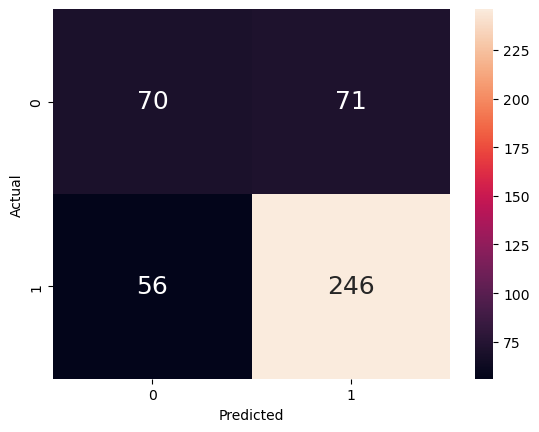

In [36]:
# model.load_model('model_IF_1.json')
# predict on testset
y_test_pred = model_IF.predict(X_test.values)
y_test_pred = pd.Series(y_test_pred)

# merge 'Graduate' and 'Enrolled' classes in y_test
y_test = pd.Series(y_test).replace(to_replace=2, value=1)
# 0:outlier (Dropout), 1: inlier
y_test_pred = y_test_pred.map({1: 1, -1: 0})

print(classification_report(y_test, y_test_pred))
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()    

In [37]:
model.save_model('model_IF_1.json')